In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_classes=2,n_samples=400,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=3)
y[y==0]=-1

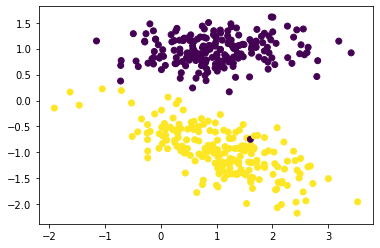

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0 
        self.b = 0
    def hingeloss(self,W,b,X,y):
        loss = 0.0
        
        loss += 0.5 * np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = y[i] * (np.dot(W,X[i].T) + b)
            
            loss += self.C * max(0,1-ti)
        return loss[0][0]
    def fit(self,X,y,batch_size=100,lr=0.001,maxIter=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        c = self.C
        W = np.zeros((1,no_of_features))
        b = 0.0
        loss_list = [] 
        
        for i in range(maxIter):
            loss = self.hingeloss(W,b,X,y)
            loss_list.append(loss)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for j in range(0,no_of_samples,batch_size):
                grad_w,grad_b = 0, 0
                
                for z in range(j,j+batch_size):
                    if z<no_of_samples:
                        id_ = ids[z]
                        ti = y[id_] * (np.dot(W,X[id_].T) + b)
                        
                        if ti<1:
                            grad_w += c*(X[id_]*y[id_])
                            grad_b += c*(y[id_])
                W = W - lr * W + lr* grad_w
                b = b + lr * grad_b
        self.W = W[0]
        self.b = b
        return W[0],b,loss_list

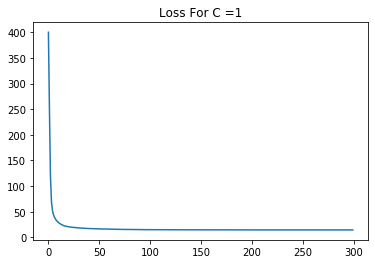

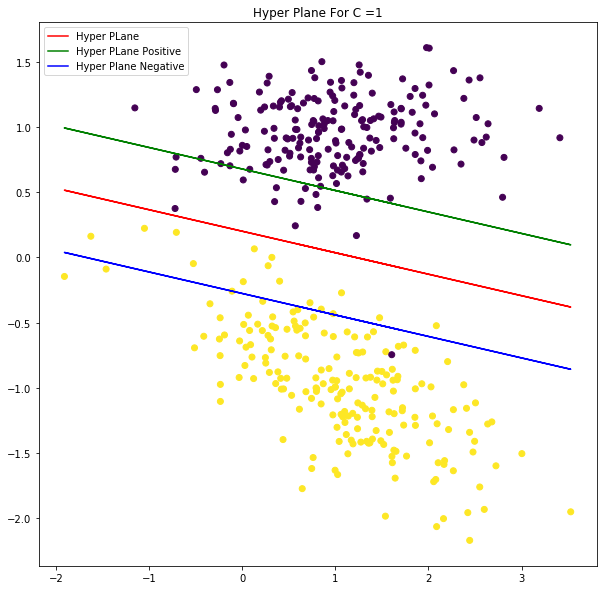

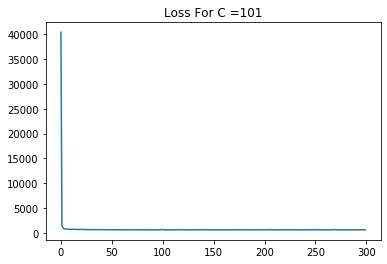

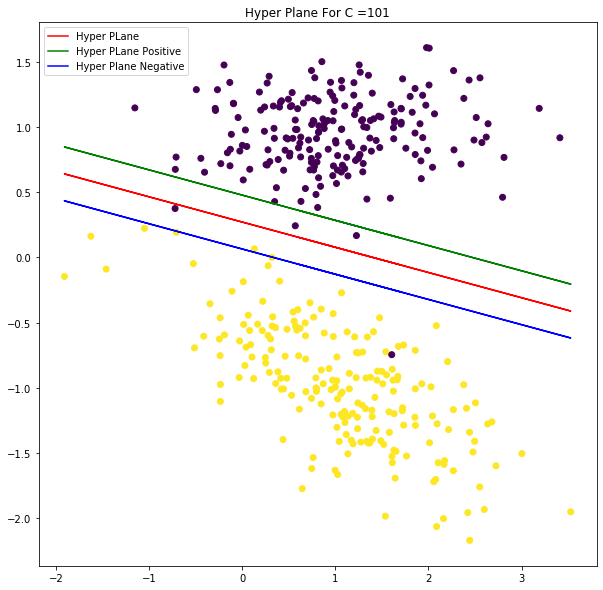

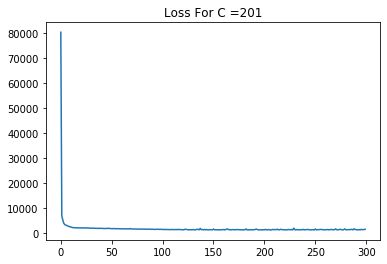

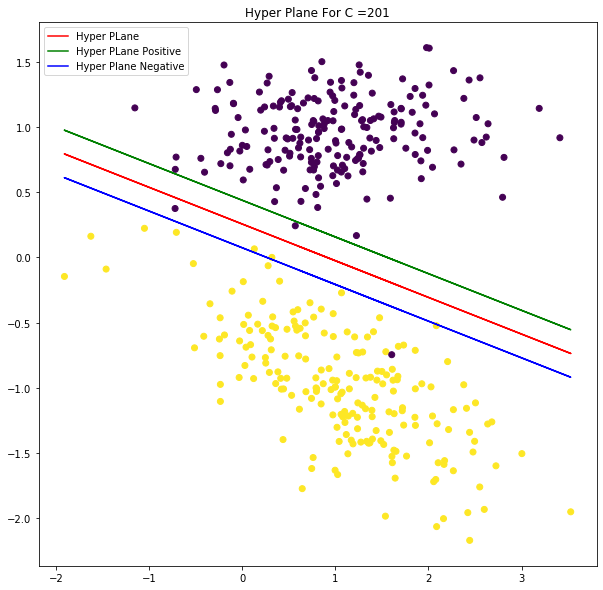

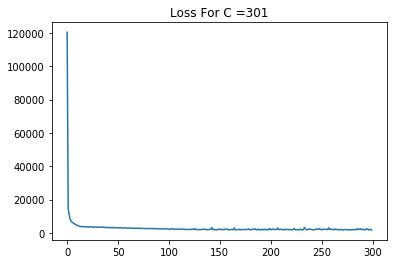

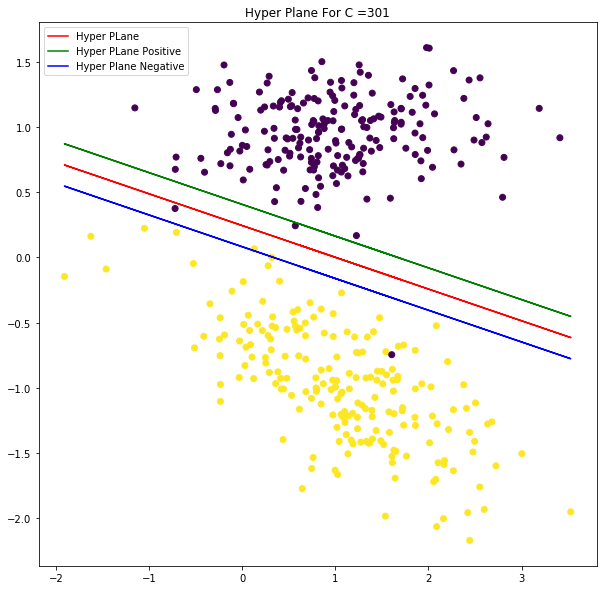

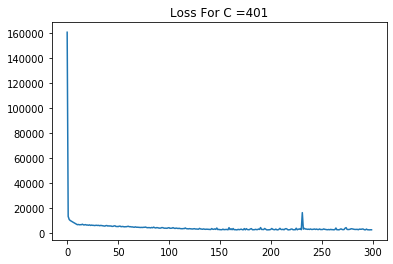

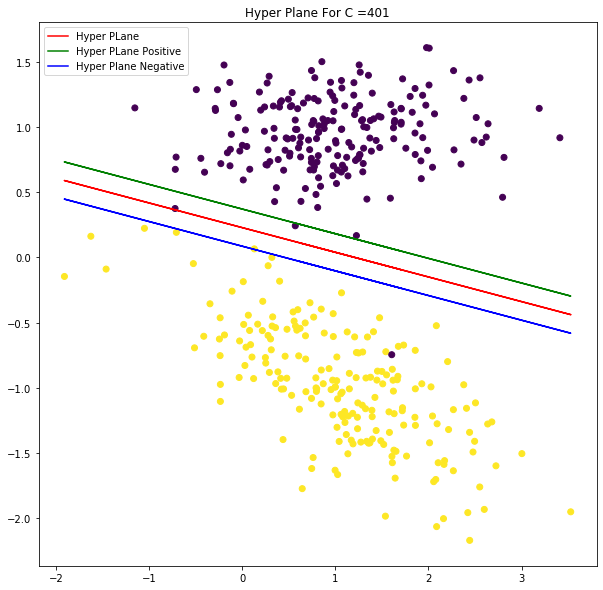

In [ ]:
for i in range(1,1002,100):
    model = SVM(C=i)
    W,b,loss_list = model.fit(X,y)

    plt.plot(loss_list)
    plt.title("Loss For C ={}".format(i))
    plt.show()

    x2 = -(W[0]*X[:,0]+b)/W[1]
    xPos = -(W[0]*X[:,0]+b+1)/W[1]
    xNeg = -(W[0]*X[:,0]+b-1)/W[1]

    plt.figure(figsize=(10,10))
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title("Hyper Plane For C ={}".format(i))
    plt.plot(X[:,0],x2,color="red",label="Hyper PLane")
    plt.plot(X[:,0],xPos,color="green",label="Hyper PLane Positive")
    plt.plot(X[:,0],xNeg,color="blue",label="Hyper Plane Negative")
    plt.legend()
    plt.show()